# Analyzing if there are periods with thermal amplitude in an extreme situation for a long period

# Also we will study if it occurs to min air humidity 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import climate as cli
import imp
imp.reload(cli)

<module 'climate' from 'C:\\Users\\Hideki\\Desktop\\IC\\TEMPERATURAS CEPAGRI 1997-2016-20180824T001014Z-001\\TEMPERATURAS CEPAGRI 1997-2016\\climate.py'>

In [2]:
data = pd.read_csv("DATA111_2DAILY_V0.csv")

In [3]:
# To better visualyze the heat waves we wil work with a shifted dataframe starting in winter

data['NEW_DAY'] = data['DAY365']

data.loc[data['DAY365'] < 152 ,'NEW_DAY'] = data[data['DAY365'] < 152]['DAY365'].values + 214
data.loc[data['DAY365'] >= 152, 'NEW_DAY'] = data[data['DAY365'] >= 152]['DAY365'].values - 151

In [4]:
data.columns.values

array(['YEAR', 'DAY365', 'MAX_N_WNDVEL_5M', 'DIR_MAX_N_WNDVEL_5M',
       'MIN_N_WNDVEL_5M', 'DIR_MIN_N_WNDVEL_5M', 'MEAN_N_WNDVEL_5M',
       'MAX_N_WNDVEL_2M', 'DIR_MAX_N_WNDVEL_2M', 'MIN_N_WNDVEL_2M',
       'DIR_MIN_N_WNDVEL_2M', 'MEAN_N_WNDVEL_2M', 'MAX_N_WNDDIR_DEGREE',
       'DIR_MAX_N_WNDDIR_DEGREE', 'MIN_N_WNDDIR_DEGREE',
       'DIR_MIN_N_WNDDIR_DEGREE', 'MEAN_N_WNDDIR_DEGREE',
       'MAX_N_INCRAD_10MSR', 'DIR_MAX_N_INCRAD_10MSR',
       'MIN_N_INCRAD_10MSR', 'DIR_MIN_N_INCRAD_10MSR',
       'MEAN_N_INCRAD_10MSR', 'MAX_N_REFRAD_10MSR',
       'DIR_MAX_N_REFRAD_10MSR', 'MIN_N_REFRAD_10MSR',
       'DIR_MIN_N_REFRAD_10MSR', 'MEAN_N_REFRAD_10MSR',
       'MAX_N_PHTFLOW_10MSR', 'DIR_MAX_N_PHTFLOW_10MSR',
       'MIN_N_PHTFLOW_10MSR', 'DIR_MIN_N_PHTFLOW_10MSR',
       'MEAN_N_PHTFLOW_10MSR', 'MAX_N_NHTFLOW_10MSR',
       'DIR_MAX_N_NHTFLOW_10MSR', 'MIN_N_NHTFLOW_10MSR',
       'DIR_MIN_N_NHTFLOW_10MSR', 'MEAN_N_NHTFLOW_10MSR',
       'MAX_N_AIRMTR_PCT10', 'DIR_MAX_N_AIRMTR_PCT10

# Creating variable of Thermal amplitude

In [5]:
data['N_TERMAMP'] = data['MAX_N_AIRTMP_MED10'] - data['MIN_N_AIRTMP_MED10']

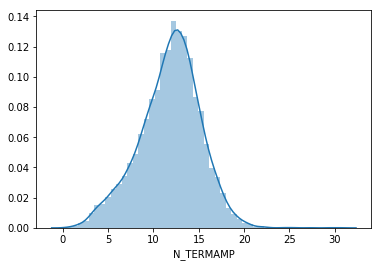

In [6]:
sns.distplot(data['N_TERMAMP'])

By the plot above it's clearly that there are periods with thermal amplitude above 20ºC which is strange, lets check

In [22]:
data[data['N_TERMAMP'] > 20].shape[0]/data.shape[0]

0.005019815059445178

In [51]:
features = ['MIN_N_AIRTMP_MED10','MAX_N_AIRTMP_MED10','DAY365','YEAR','MIN_N_AIRMTR_PCT10','MAX_N_AIRMTR_PCT10','N_TERMAMP']

data[data['N_TERMAMP'] > 20][features]

,MIN_N_AIRTMP_MED10,MAX_N_AIRTMP_MED10,DAY365,YEAR,MIN_N_AIRMTR_PCT10,MAX_N_AIRMTR_PCT10,N_TERMAMP
250,11.29,33.26,251.0,1997.0,26.95,100.00,21.97
315,22.68,44.80,316.0,1997.0,62.14,100.00,22.12
393,22.18,42.30,29.0,1998.0,51.69,100.00,20.12
790,7.63,27.87,110.0,1999.0,45.90,98.50,20.24
902,7.05,28.73,222.0,1999.0,22.98,94.60,21.68
903,9.18,30.46,223.0,1999.0,21.26,88.20,21.28
925,11.49,32.05,245.0,1999.0,17.55,76.60,20.56
926,11.61,32.04,246.0,1999.0,17.27,77.60,20.43
1196,6.63,27.03,151.0,2000.0,7.62,89.10,20.40
1406,20.18,44.45,363.0,2000.0,100.00,100.00,24.27


I cant see anything extremely wrong (except for the day 258 in 2003 with 30ºC of amplitude), but its important to check with Dra Ana so lets get days and years 

In [26]:
data[data['N_TERMAMP'] > 20][['DAY365','YEAR']]

,DAY365,YEAR
250,251.0,1997.0
315,316.0,1997.0
393,29.0,1998.0
790,110.0,1999.0
902,222.0,1999.0
903,223.0,1999.0
925,245.0,1999.0
926,246.0,1999.0
1196,151.0,2000.0
1406,363.0,2000.0


# Generating the tag if thermal amplitude exceeds p90th

In [7]:
% time
flag_thermamp = 'e_THERMAMP'
flag_unique1 = 'unique_e_THERMAMP'
# var_temperature = 'MEAN_N_AIRTMP_MED10'
percentile = .90
# Getting index CTX90pct
fv = cli.get_heatwave(data, flag_thermamp, hw_name = flag_unique1, percentile=percentile, index = 'CTX90pct',max_tmp_name = 'N_TERMAMP')


# Getting COLDWAVE index CTN90pct
percentile = .1
flag_minhum2 = 'e_minhum'
flag_unique2 = 'unique_e_minhum'
fv = cli.get_coldwave(fv, flag_minhum2, cw_name = flag_unique2, percentile=percentile, index = 'CTN90pct', min_tmp_name='MIN_N_AIRMTR_PCT10')

Wall time: 0 ns


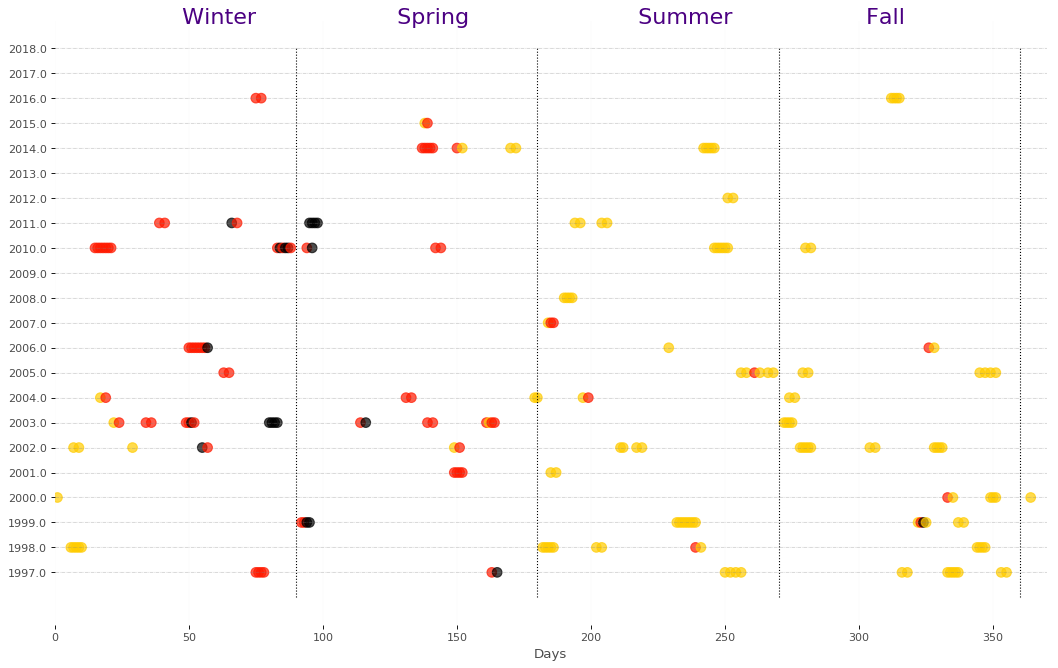

In [8]:
cli.plot_heatwave(fv,flag_thermamp,'N_TERMAMP')

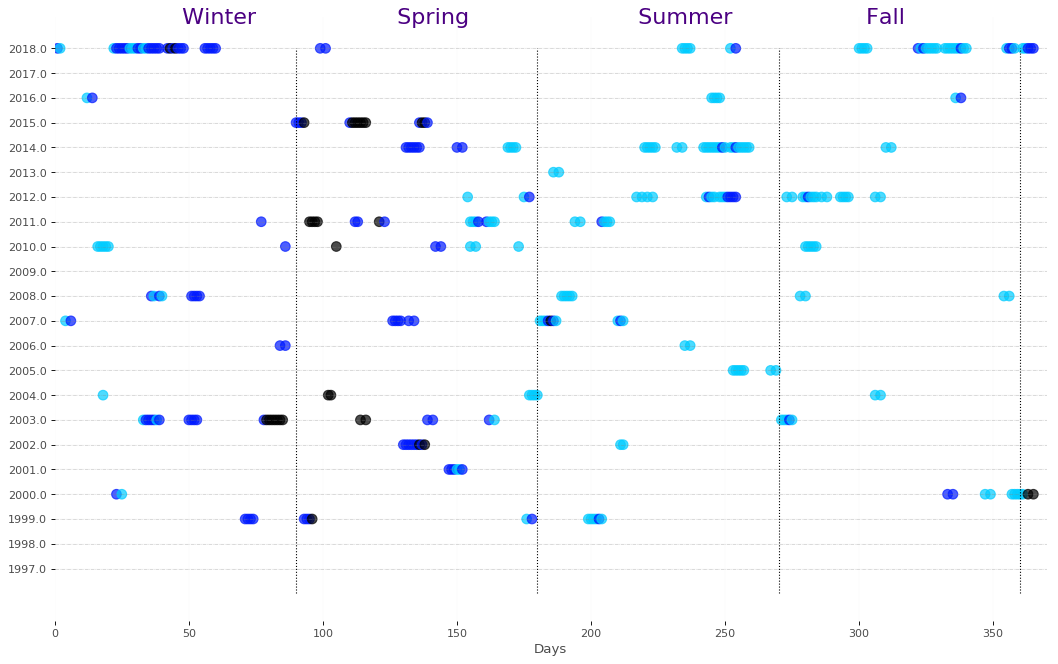

In [9]:
cli.plot_coldwave(fv,flag_minhum2,'MIN_N_AIRMTR_PCT10')

# Plot of how many days of extreme events by year in both cases

In [86]:
to_plot = fv[fv[flag_thermamp] != 0].groupby('YEAR').agg({flag_thermamp : np.sum}).reset_index()
to_plot2 = fv[fv[flag_minhum2] != 0].groupby('YEAR').agg({flag_minhum2 : np.sum}).reset_index()


In [87]:
to_plot

,YEAR,e_THERMAMP
0,1997.0,19
1,1998.0,18
2,1999.0,18
3,2000.0,7
4,2001.0,6
5,2002.0,22
6,2003.0,24
7,2004.0,10
8,2005.0,14
9,2006.0,11


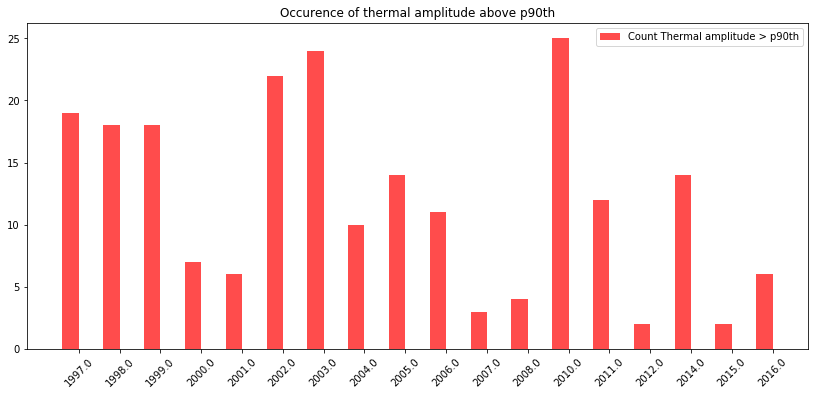

In [88]:
plt.figure(figsize=(14,6))
width = 0.40
plt.title("Occurence of thermal amplitude above p90th")
plt.bar(np.arange(to_plot.shape[0]) - width/2, to_plot[flag_thermamp], width = width,label='Count Thermal amplitude > p90th' ,color='r',alpha = 0.7)

plt.xticks(np.arange(to_plot.shape[0]),to_plot['YEAR'], rotation = 45)

plt.legend()
plt.show()

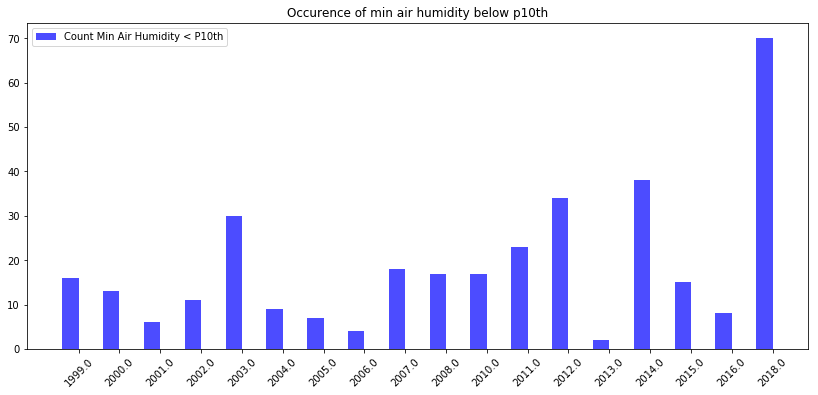

In [89]:
plt.figure(figsize=(14,6))
width = 0.40

plt.title("Occurence of min air humidity below p10th")
plt.bar(np.arange(to_plot2.shape[0]) - width/2, to_plot2[flag_minhum2], width = width,label='Count Min Air Humidity < P10th',color='b',alpha = 0.7)

plt.xticks(np.arange(to_plot2.shape[0]),to_plot2['YEAR'], rotation = 45)

plt.legend()
plt.show()

# Looking to 2018 where the min humidity below p10th occurs the most

In [94]:
# getting series of pct90 min and max along this year

df_2014 = fv[fv['YEAR'] == 2018]

percentile = .9
day_name = 'DAY365'
var_2P90 = 'N_TERMAMP'
var_2P10 = 'MIN_N_AIRMTR_PCT10'


pth_max = []
pth_min = []

for d in df_2014.DAY365.unique():
    # For each day we will have a different pct
    df_pct = data[(data[day_name] >= d-14) & (data[day_name] <= d + 14)]

    pth_max.append(df_pct[var_2P90].quantile(percentile))
    pth_min.append(df_pct[var_2P10].quantile(0.1))
    

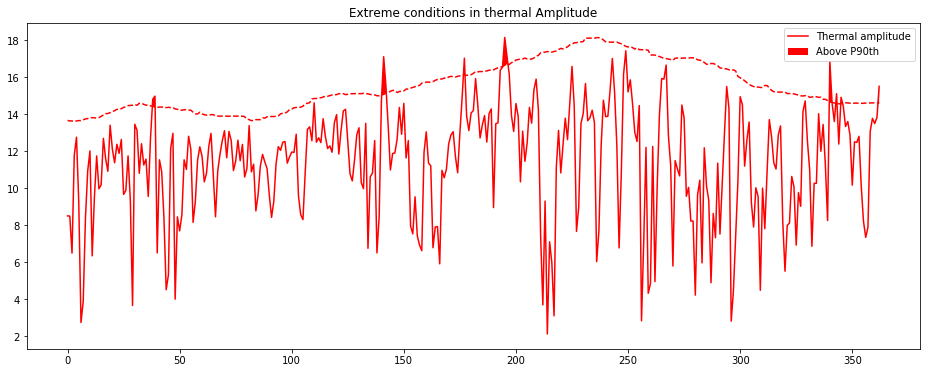

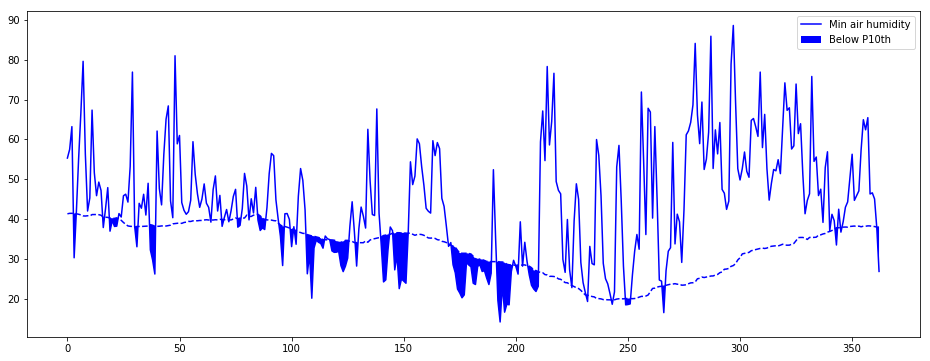

In [95]:
plt.figure(figsize=(16,6))

plt.title("Extreme conditions in thermal Amplitude")

x = np.arange(len(pth_max))
y1 = df_2014[var_2P90]
y2 = pth_max

plt.plot(x,y1, color='r', label='Thermal amplitude')
plt.plot(x,y2, color= 'r', linestyle = '--')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True,label='Above P90th')

plt.legend()
plt.show()

plt.figure(figsize=(16,6))
x = np.arange(len(pth_min))
y1 = df_2014[var_2P10]
y2 = pth_min
plt.plot(x,y1,color='b', label='Min air humidity')
plt.plot(x,y2, color= 'b', linestyle = '--')
plt.fill_between(x, y1, y2, where=y1 <= y2, facecolor='blue', interpolate=True, label='Below P10th')

# plt.xticks(np.arange(df_2014.DAY365.nunique()), df_2014.DAY365.unique(), rotation = 90)

plt.legend()
plt.show()

# by the graphs we can make 2 hypothesis:

1. **Thermal amplitude is decreasing along the years**
2. **Min air humidity is increasing along the years**

so lets check..

In [48]:
to_plot = fv.groupby('YEAR').agg({'N_TERMAMP': np.max}).reset_index()
to_plot2 = fv.groupby('YEAR').agg({'MIN_N_AIRMTR_PCT10': np.mean}).reset_index()

to_plot['MIN_N_AIRMTR_PCT10'] = to_plot2['MIN_N_AIRMTR_PCT10']

to_plot = to_plot[to_plot['YEAR'] != 2017]

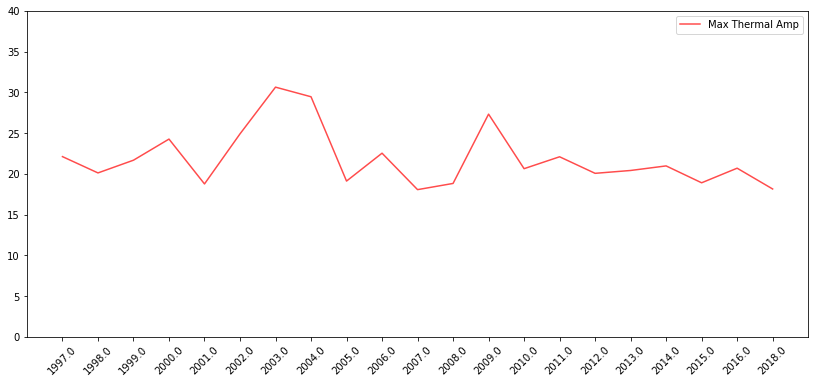

In [50]:
plt.figure(figsize=(14,6))
width = 0.40

plt.plot(np.arange(to_plot.shape[0]) , to_plot['N_TERMAMP'], label='Max Thermal Amp',color='r',alpha = 0.7)

plt.xticks(np.arange(to_plot.shape[0]),to_plot['YEAR'], rotation = 45)
plt.ylim(ymin= 0, ymax = 40)
plt.legend()
plt.show()

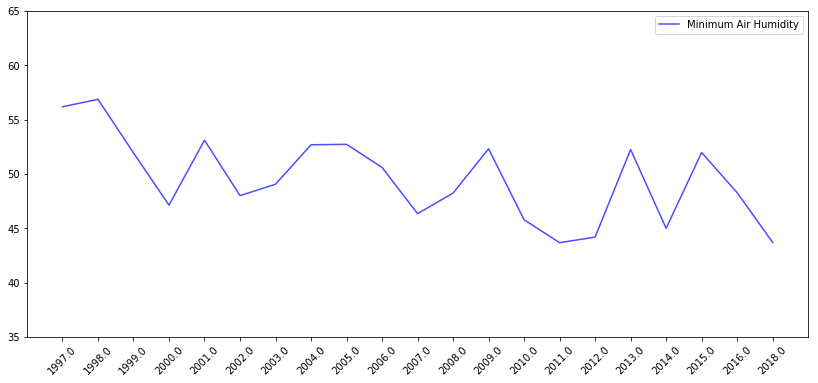

In [46]:
plt.figure(figsize=(14,6))
width = 0.40

plt.plot(np.arange(to_plot.shape[0]) , to_plot['MIN_N_AIRMTR_PCT10'],label='Minimum Air Humidity',color='b',alpha = 0.7)

plt.xticks(np.arange(to_plot.shape[0]),to_plot['YEAR'], rotation = 45)

plt.ylim(ymin=35, ymax=65)

plt.legend()
plt.show()

In [52]:
from mpl_toolkits import mplot3d

In [55]:
years = data.YEAR.unique()

TypeError: contour() missing 1 required positional argument: 'Z'

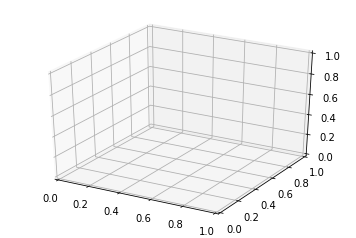

In [62]:
ax = plt.axes(projection='3d')
ax.contour(data['DAY365'], data['N_TERMAMP'], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

<IPython.core.display.Javascript object>


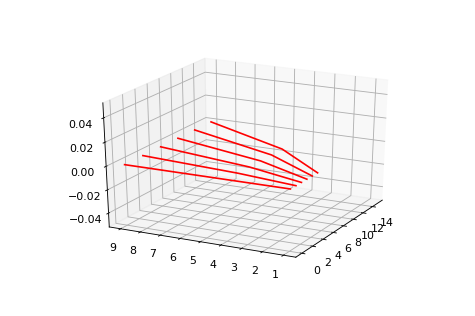

In [71]:
%matplotlib notebook
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

datasets = [{"x":[1*i,2*i,3*i], "y":[1,4,9], "z":[0,0,0], "colour": "red"} for i in range(6)]

for dataset in datasets:
    ax.plot(dataset["x"], dataset["y"], dataset["z"], color=dataset["colour"])